In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Esthétique des graphs
sns.set_theme(style="whitegrid", palette="muted")

# Chargement du CSV
try:
    df = pd.read_csv('../data/creditcard.csv')
    print("✅ Dataset chargé avec succès.")
except FileNotFoundError:
    print("❌ Erreur : Fichier non trouvé. Vérifie qu'il est bien dans 'data/'.")

# Aperçu rapide
print(f"Dimensions : {df.shape}")
print("-" * 30)
print("Valeurs manquantes :", df.isnull().sum().max())
print("-" * 30)
df.head()

✅ Dataset chargé avec succès.
Dimensions : (284807, 31)
------------------------------
Valeurs manquantes : 0
------------------------------


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


C:\Users\BOOTCAMP\AppData\Local\Temp\ipykernel_10396\2015901203.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(df['Class'], sort=True)
C:\Users\BOOTCAMP\AppData\Local\Temp\ipykernel_10396\2015901203.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=count_classes.index, y=count_classes.values, palette=['#3498db', '#e74c3c'])


Transactions Normales (0) : 284315
Transactions Frauduleuses (1) : 492
⚠️ Taux de Fraude : 0.173 %


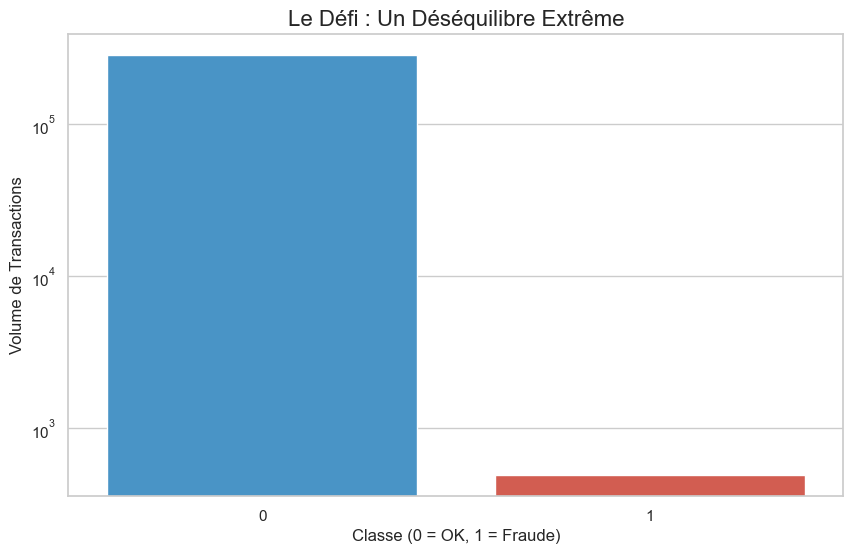

In [ ]:
# Comptage
count_classes = pd.value_counts(df['Class'], sort=True)
fraud_share = (count_classes[1] / len(df)) * 100

print(f"Transactions Normales (0) : {count_classes[0]}")
print(f"Transactions Frauduleuses (1) : {count_classes[1]}")
print(f"⚠️ Taux de Fraude : {fraud_share:.3f} %")

# Visualisation 
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=count_classes.index, y=count_classes.values, palette=['#3498db', '#e74c3c'])
plt.title("Le Défi : Un Déséquilibre Extrême", fontsize=16)
plt.xlabel("Classe (0 = OK, 1 = Fraude)")
plt.ylabel("Volume de Transactions")
plt.yscale('log')
plt.show()

--- Résumé des Montants (€) ---
          count        mean         std  min   25%    50%     75%       max
Class                                                                      
0      284315.0   88.291022  250.105092  0.0  5.65  22.00   77.05  25691.16
1         492.0  122.211321  256.683288  0.0  1.00   9.25  105.89   2125.87


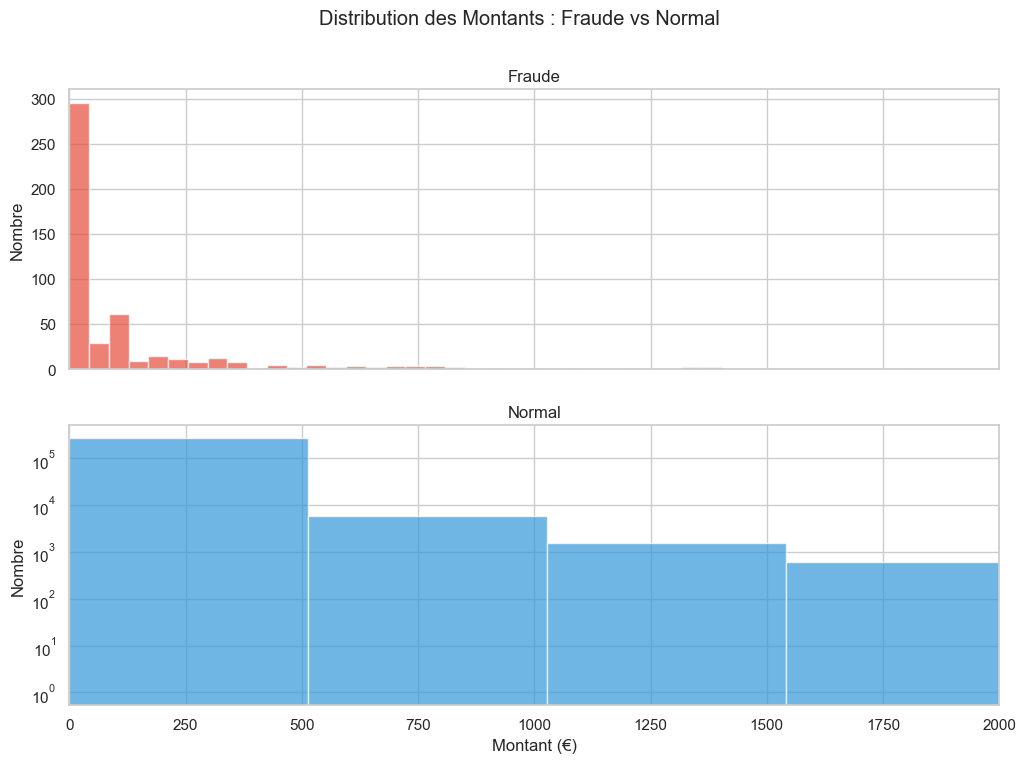

In [ ]:
# Stats descriptives sur le montant
print("--- Résumé des Montants (€) ---")
print(df.groupby('Class')['Amount'].describe())

# Visualisation
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 8))
f.suptitle('Distribution des Montants : Fraude vs Normal')

frauds = df[df.Class == 1]
normal = df[df.Class == 0]

ax1.hist(frauds.Amount, bins=50, color='#e74c3c', alpha=0.7)
ax1.set_title('Fraude')
ax1.set_ylabel('Nombre')

ax2.hist(normal.Amount, bins=50, color='#3498db', alpha=0.7)
ax2.set_title('Normal')
ax2.set_xlabel('Montant (€)')
ax2.set_ylabel('Nombre')

plt.xlim((0, 2000)) # Zomm sur les transactions < 2000€
plt.yscale('log')
plt.show()